# Part 1. EDA

In [1]:
import pandas as pd
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import plotly.offline as pyo
import plotly.graph_objs as go

# Set notebook mode to work in offline
pyo.init_notebook_mode()

%matplotlib inline

In [2]:
df = pd.read_csv('telecom_customer_churn.csv').set_index('Customer ID')
data = df.copy()
data.head()

Gender  Age Married  Number of Dependents          City  \
Customer ID                                                            
0002-ORFBO   Female   37     Yes                     0  Frazier Park   
0003-MKNFE     Male   46      No                     0      Glendale   
0004-TLHLJ     Male   50      No                     0    Costa Mesa   
0011-IGKFF     Male   78     Yes                     0      Martinez   
0013-EXCHZ   Female   75     Yes                     0     Camarillo   

             Zip Code   Latitude   Longitude  Number of Referrals  \
Customer ID                                                         
0002-ORFBO      93225  34.827662 -118.999073                    2   
0003-MKNFE      91206  34.162515 -118.203869                    0   
0004-TLHLJ      92627  33.645672 -117.922613                    0   
0011-IGKFF      94553  38.014457 -122.115432                    1   
0013-EXCHZ      93010  34.227846 -119.079903                    3   

             Tenure in Months  ...   Payment Method Monthly Charge  \
Customer ID                    ...                                   
0002-ORFBO                  9  ...      Credit Card           65.6   
0003-MKNFE                  9  ...      Credit Card           -4.0   
0004-TLHLJ                  4  ...  Bank Withdrawal           73.9   
0011-IGKFF                 13  ...  Bank Withdrawal           98.0   
0013-EXCHZ                  3  ...      Credit Card           83.9   

             Total Charges Total Refunds Total Extra Data Charges  \
Customer ID                                                         
0002-ORFBO          593.30          0.00                        0   
0003-MKNFE          542.40         38.33                       10   
0004-TLHLJ          280.85          0.00                        0   
0011-IGKFF         1237.85          0.00                        0   
0013-EXCHZ          267.40          0.00                        0   

            Total Long Distance Charges  Total Revenue Customer Status  \
Customer ID                                                              
0002-ORFBO                       381.51         974.81          Stayed   
0003-MKNFE                        96.21         610.28          Stayed   
0004-TLHLJ                       134.60         415.45         Churned   
0011-IGKFF                       361.66        1599.51         Churned   
0013-EXCHZ                        22.14         289.54         Churned   

              Churn Category                   Churn Reason  
Customer ID                                                  
0002-ORFBO               NaN                            NaN  
0003-MKNFE               NaN                            NaN  
0004-TLHLJ        Competitor  Competitor had better devices  
0011-IGKFF   Dissatisfaction        Product dissatisfaction  
0013-EXCHZ   Dissatisfaction            Network reliability  

[5 rows x 37 columns]

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of use_sample to True.

In [3]:
use_sample = False
sample_fraction = 0.3

In [4]:
if use_sample:
    data = data.sample(frac=sample_fraction).copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-nu

In [6]:
def reduce_size(df):
    
    df.columns = df.columns.str.replace(' ', '_').str.lower()
        
    
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    columns = df.columns.to_list()
    for col in columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int8')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float64')
        elif df[col].dtype == 'object':
            df[col] = df[col].astype('category') 
        
    return df

In [7]:
data = reduce_size(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                7043 non-null   int8    
 2   married                            7043 non-null   category
 3   number_of_dependents               7043 non-null   int8    
 4   city                               7043 non-null   category
 5   zip_code                           7043 non-null   int8    
 6   latitude                           7043 non-null   float64 
 7   longitude                          7043 non-null   float64 
 8   number_of_referrals                7043 non-null   int8    
 9   tenure_in_months                   7043 non-null   int8    
 10  offer                              7043 non-null   category
 11  phone_service                    

In [8]:
# stastical summery
data.select_dtypes('number').describe()

age  number_of_dependents     zip_code     latitude  \
count  7043.000000           7043.000000  7043.000000  7043.000000   
mean     46.509726              0.468692    -2.963084    36.197455   
std      16.750352              0.962802    77.959874     2.468929   
min      19.000000              0.000000  -128.000000    32.555828   
25%      32.000000              0.000000   -72.000000    33.990646   
50%      46.000000              0.000000   -17.000000    36.205465   
75%      60.000000              0.000000    74.000000    38.161321   
max      80.000000              9.000000   127.000000    41.962127   

         longitude  number_of_referrals  tenure_in_months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       avg_monthly_long_distance_charges  avg_monthly_gb_download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  2.498935   
std         31.204743    2266.220462       7.902614                 23.768440   
min        -10.000000      18.800000       0.000000               -126.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                120.000000   

       total_long_distance_charges  total_revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

### Data Visualization & Data Exploration

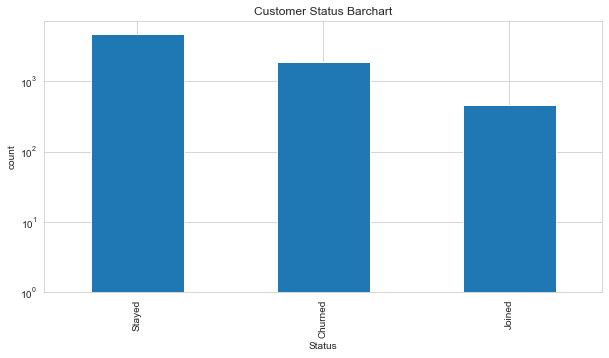

In [9]:
data.customer_status.value_counts().plot(
    kind = 'bar', log = True, 
    xlabel = 'Status', ylabel = 'count',
    title = 'Customer Status Barchart', figsize = (10,5), 
);

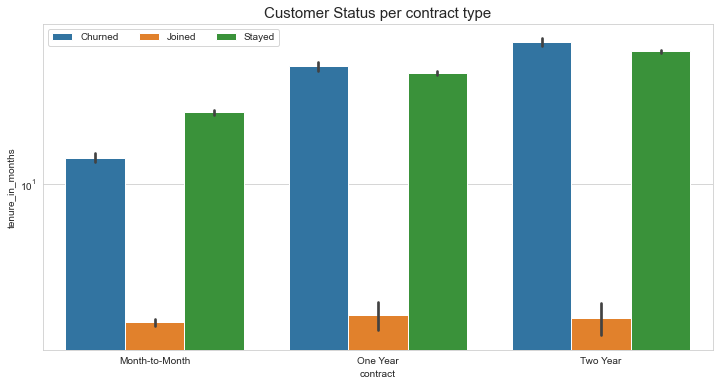

In [10]:
fig = plt.subplots(figsize = (12,6))
sns.barplot(x = 'contract', y = 'tenure_in_months', hue = 'customer_status', data = data,  log = True)
plt.legend(ncol = 3)
plt.title('Customer Status per contract type', size = 15);

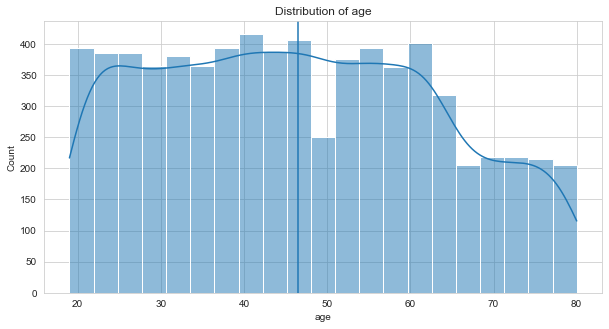

In [11]:
plt.subplots(figsize = (10,5))
sns.histplot(data.age, kde = True)
plt.title('Distribution of age')
plt.axvline(data.age.mean(), ls = '-');

In [12]:
data.select_dtypes('number').isna().sum()/len(data)

age                                  0.000000
number_of_dependents                 0.000000
zip_code                             0.000000
latitude                             0.000000
longitude                            0.000000
number_of_referrals                  0.000000
tenure_in_months                     0.000000
avg_monthly_long_distance_charges    0.096834
avg_monthly_gb_download              0.216669
monthly_charge                       0.000000
total_charges                        0.000000
total_refunds                        0.000000
total_extra_data_charges             0.000000
total_long_distance_charges          0.000000
total_revenue                        0.000000
dtype: float64

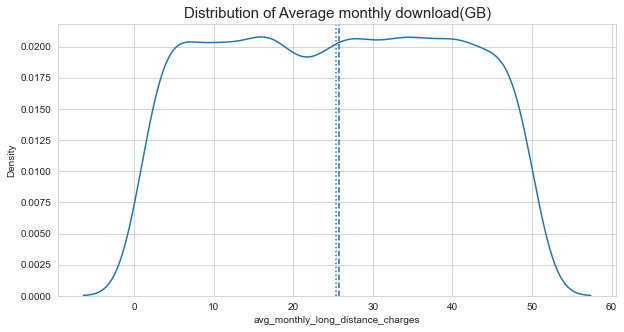

In [13]:
plt.subplots(figsize = (10,5))
sns.kdeplot(data.avg_monthly_long_distance_charges)
plt.axvline(data.avg_monthly_long_distance_charges.mean(), ls = ':')
plt.axvline(data.avg_monthly_long_distance_charges.median(), ls = '--')
plt.title('Distribution of Average monthly download(GB)', size = 15);

In [14]:
#dealing with missing values
data['avg_monthly_long_distance_charges'] = data.avg_monthly_long_distance_charges.fillna(data.avg_monthly_long_distance_charges.median(), axis = 0)

In [15]:
data.select_dtypes('number').isna().sum()/len(data)

age                                  0.000000
number_of_dependents                 0.000000
zip_code                             0.000000
latitude                             0.000000
longitude                            0.000000
number_of_referrals                  0.000000
tenure_in_months                     0.000000
avg_monthly_long_distance_charges    0.000000
avg_monthly_gb_download              0.216669
monthly_charge                       0.000000
total_charges                        0.000000
total_refunds                        0.000000
total_extra_data_charges             0.000000
total_long_distance_charges          0.000000
total_revenue                        0.000000
dtype: float64

In [16]:
px.scatter(data,x = 'total_revenue', y =  'total_charges', color = 'customer_status')

In [17]:
px.scatter(data,x = 'monthly_charge', y =  'total_revenue', color = 'customer_status', 
          title = 'Monthly Charge vs Total Revenus')

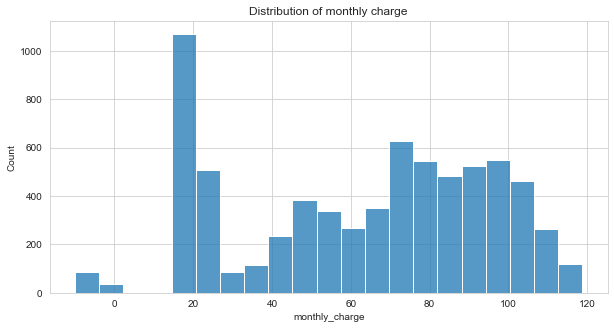

In [18]:
plt.subplots(figsize = (10,5))
sns.histplot(data , x = 'monthly_charge')
plt.title('Distribution of monthly charge');

In [19]:
data.monthly_charge.min()

-10.0

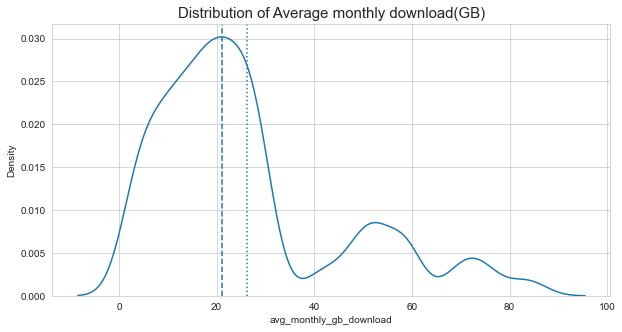

In [20]:
plt.subplots(figsize = (10,5))
sns.kdeplot(data.avg_monthly_gb_download)
plt.axvline(data.avg_monthly_gb_download.mean(), ls = ':')
plt.axvline(data.avg_monthly_gb_download.median(), ls = '--')
plt.title('Distribution of Average monthly download(GB)', size = 15);

In [21]:
#fill nan values with median
data['avg_monthly_gb_download'] = data.avg_monthly_gb_download.fillna(data.avg_monthly_gb_download.median())

In [22]:
data.avg_monthly_gb_download.isna().sum()

0

**Dealing with categorical missing values**

In [23]:
data.select_dtypes('category').isna().sum()/len(data)

gender                    0.000000
married                   0.000000
city                      0.000000
offer                     0.000000
phone_service             0.000000
multiple_lines            0.096834
internet_service          0.000000
internet_type             0.216669
online_security           0.216669
online_backup             0.216669
device_protection_plan    0.216669
premium_tech_support      0.216669
streaming_tv              0.216669
streaming_movies          0.216669
streaming_music           0.216669
unlimited_data            0.216669
contract                  0.000000
paperless_billing         0.000000
payment_method            0.000000
customer_status           0.000000
churn_category            0.734630
churn_reason              0.734630
dtype: float64

In [24]:
#drop 'churn_category' and 'churn_reason'
data = data.drop(columns = ['churn_category', 'churn_reason'])

In [25]:
data.columns[-3:]

Index(['total_long_distance_charges', 'total_revenue', 'customer_status'], dtype='object')

In [26]:
columns = data.select_dtypes('category').columns
for col in data.select_dtypes('category').columns:
    if data[col].isna().sum()/len(data) > 0:
        data[col] = data[col].fillna(method = 'ffill', axis = 0)

In [27]:
data.isna().sum()

gender                               0
age                                  0
married                              0
number_of_dependents                 0
city                                 0
zip_code                             0
latitude                             0
longitude                            0
number_of_referrals                  0
tenure_in_months                     0
offer                                0
phone_service                        0
avg_monthly_long_distance_charges    0
multiple_lines                       0
internet_service                     0
internet_type                        0
avg_monthly_gb_download              0
online_security                      0
online_backup                        0
device_protection_plan               0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
unlimited_data                       0
contract                 

In [28]:
clean_data = data.copy()

In [29]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                7043 non-null   int8    
 2   married                            7043 non-null   category
 3   number_of_dependents               7043 non-null   int8    
 4   city                               7043 non-null   category
 5   zip_code                           7043 non-null   int8    
 6   latitude                           7043 non-null   float64 
 7   longitude                          7043 non-null   float64 
 8   number_of_referrals                7043 non-null   int8    
 9   tenure_in_months                   7043 non-null   int8    
 10  offer                              7043 non-null   category
 11  phone_service                    

In [30]:
px.histogram(clean_data, x = 'online_security', color = 'customer_status',
             title = 'Online Security vs Customer Status')

In [31]:
px.histogram(clean_data, x = 'unlimited_data', color = 'customer_status')

In [32]:
px.histogram(clean_data, x = 'offer', color = 'customer_status', title = 'Offer vs Customer status')

In [33]:
px.histogram(clean_data, x = 'streaming_movies', color = 'customer_status', title = 'Streaming Movies vs Customer status')

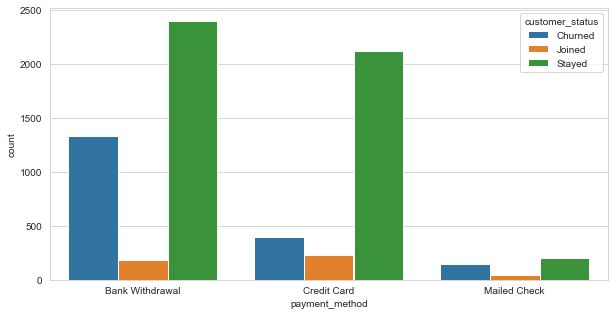

In [34]:
plt.subplots(figsize = (10,5))
sns.countplot(x = 'payment_method', hue = 'customer_status', data = clean_data);

### Data Preparation

**Dealing with outliers**

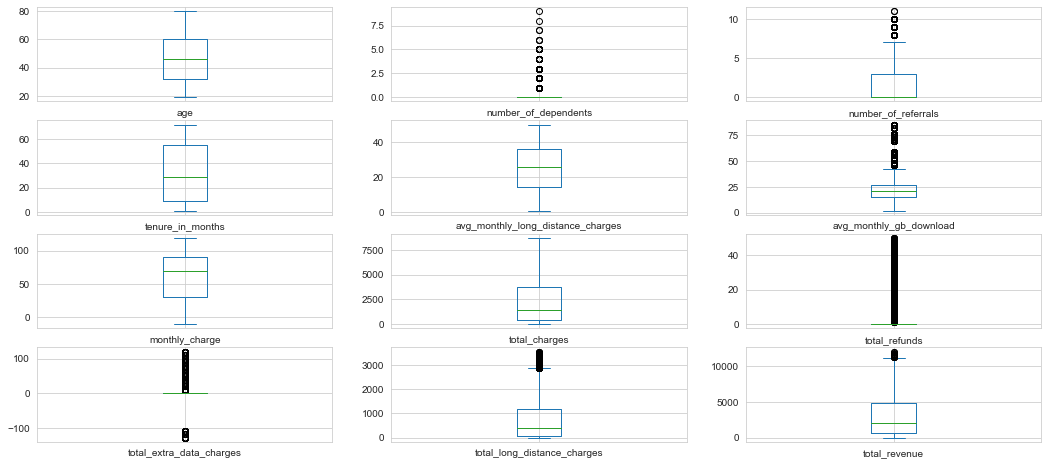

In [35]:
df_box = clean_data.select_dtypes('number').drop(columns = ['zip_code', 'latitude','longitude'])
df_box.plot(kind='box',subplots=True, layout=(4,3),figsize=(18,8))
plt.show()

In [36]:
clean_data.avg_monthly_gb_download.describe()

count    7043.000000
mean       25.065455
std        17.466342
min         2.000000
25%        15.000000
50%        21.000000
75%        27.000000
max        85.000000
Name: avg_monthly_gb_download, dtype: float64

In [37]:
cols = clean_data.select_dtypes('number').drop(columns = ['zip_code', 'latitude','longitude']).columns
len(df_box.columns)

12

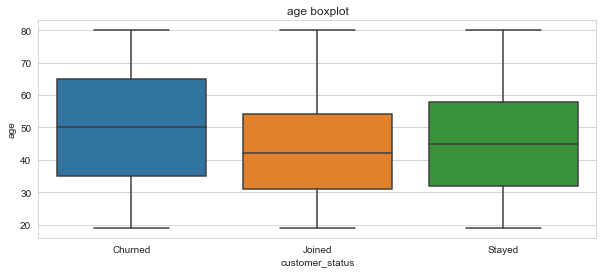

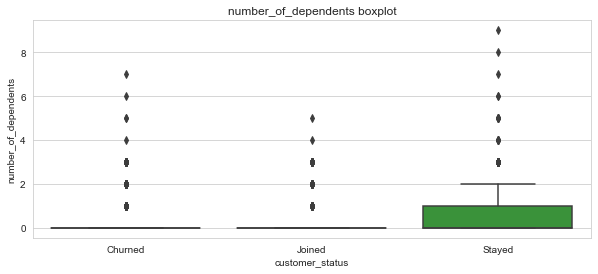

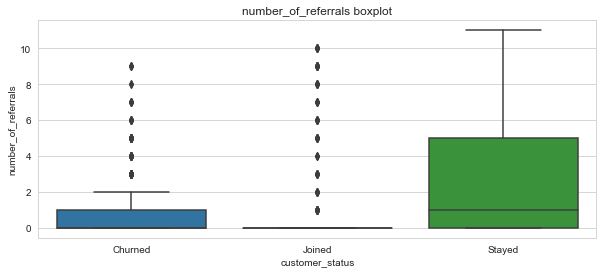

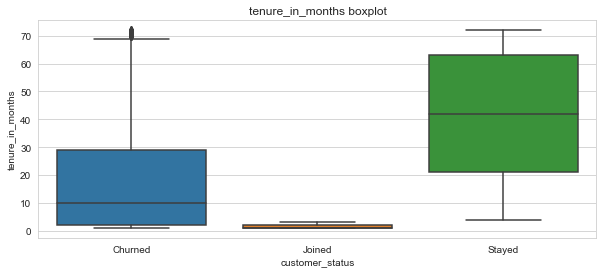

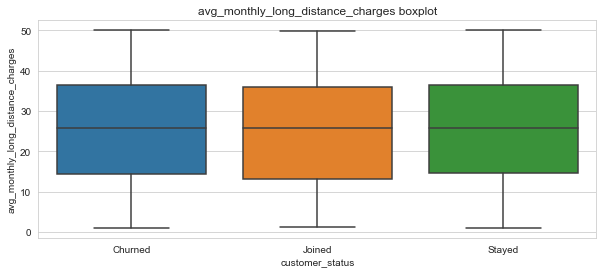

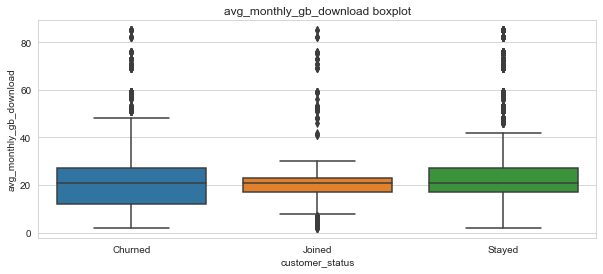

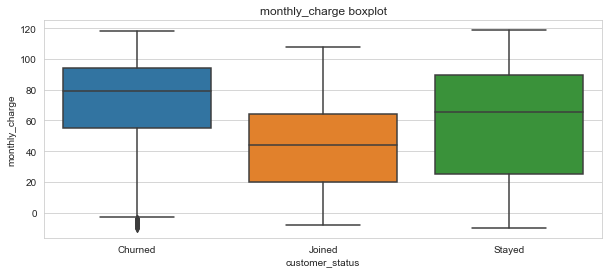

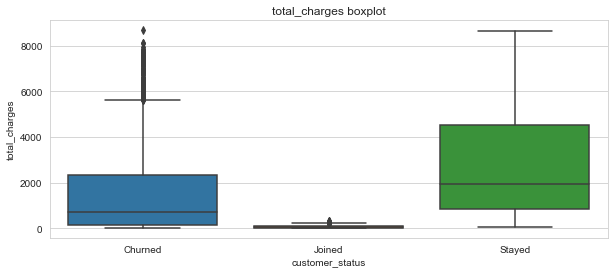

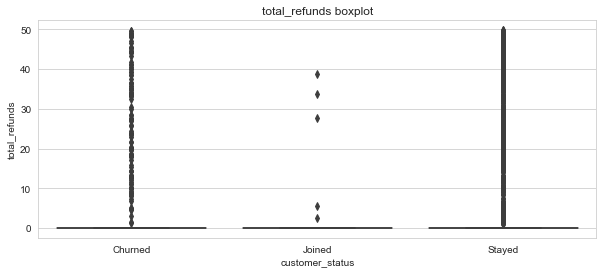

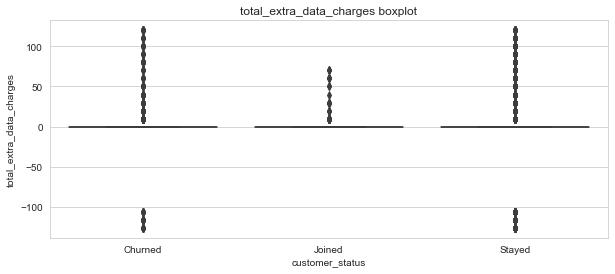

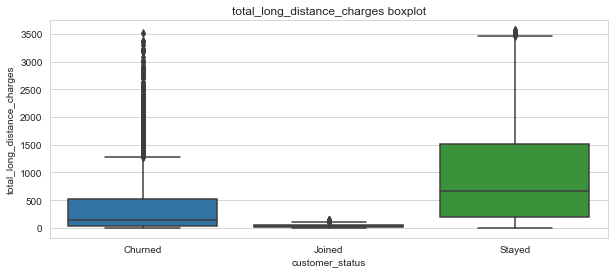

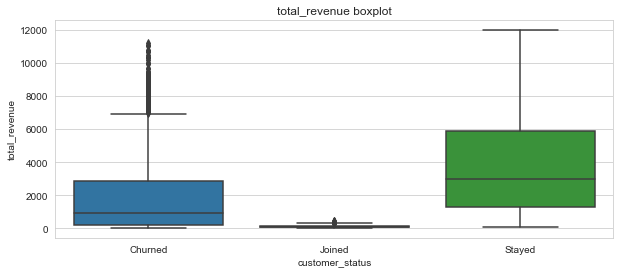

In [38]:
# fig, ax = plt.subplots(4, 3, figsize = (12,5))
for col in cols:
    plt.subplots(figsize = (10,4))
    sns.boxplot(x =  'customer_status', y =clean_data[col] , data = clean_data)
    plt.title(col + ' ' + 'boxplot')

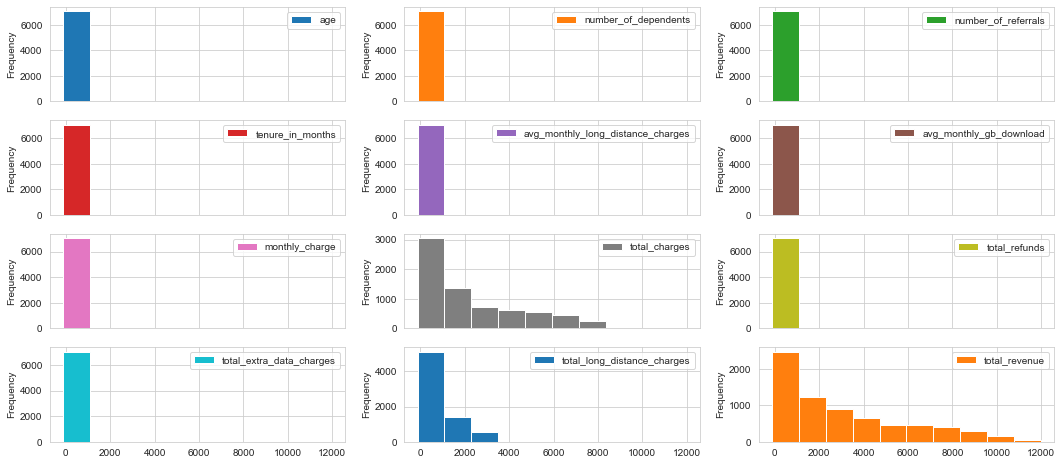

In [39]:
df_box.plot(kind='hist',subplots=True, layout=(4,3),figsize=(18,8));

In [40]:
def clean_out(df):
    loop = 0
    cols = df.select_dtypes('number').drop(columns = ['zip_code', 'latitude','longitude']).columns
    for col in cols:
        q1, q9 = df[col].quantile([0.05, 0.95])
        mask = df[col].between(q1,q9)
        df_mask = df[mask]
        df[col] = df_mask[col]
        loop += 1
        if loop == len(cols):
            break
    print(loop)
    return df

In [41]:
len(clean_data.select_dtypes('number').drop(columns = ['zip_code', 'latitude','longitude']).columns)

12

In [42]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                7043 non-null   int8    
 2   married                            7043 non-null   category
 3   number_of_dependents               7043 non-null   int8    
 4   city                               7043 non-null   category
 5   zip_code                           7043 non-null   int8    
 6   latitude                           7043 non-null   float64 
 7   longitude                          7043 non-null   float64 
 8   number_of_referrals                7043 non-null   int8    
 9   tenure_in_months                   7043 non-null   int8    
 10  offer                              7043 non-null   category
 11  phone_service                    

In [43]:
df_clean = clean_out(clean_data)
df_clean.info()

12
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                6443 non-null   float64 
 2   married                            7043 non-null   category
 3   number_of_dependents               7017 non-null   float64 
 4   city                               7043 non-null   category
 5   zip_code                           7043 non-null   int8    
 6   latitude                           7043 non-null   float64 
 7   longitude                          7043 non-null   float64 
 8   number_of_referrals                6818 non-null   float64 
 9   tenure_in_months                   7043 non-null   int8    
 10  offer                              7043 non-null   category
 11  phone_service                 

In [44]:
data.total_extra_data_charges.describe() #.plot(kind = 'box')

count    7043.000000
mean        2.498935
std        23.768440
min      -126.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       120.000000
Name: total_extra_data_charges, dtype: float64

In [45]:
# df = clean(clean_data)
# df.monthly_charge.min()

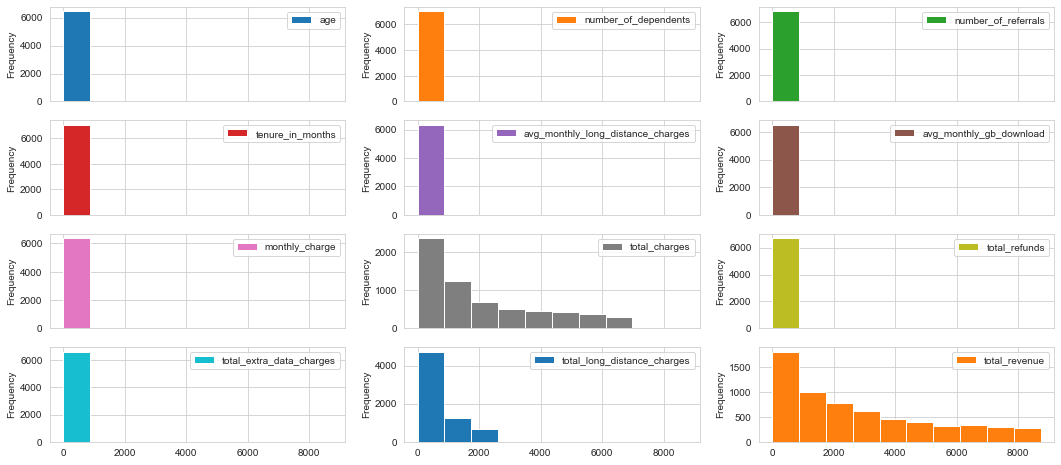

In [46]:
df_box1 = df_clean.select_dtypes('number').drop(columns = ['zip_code', 'latitude','longitude']).copy()
df_box1.plot(kind='hist',subplots=True, layout=(4,3),figsize=(18,8));

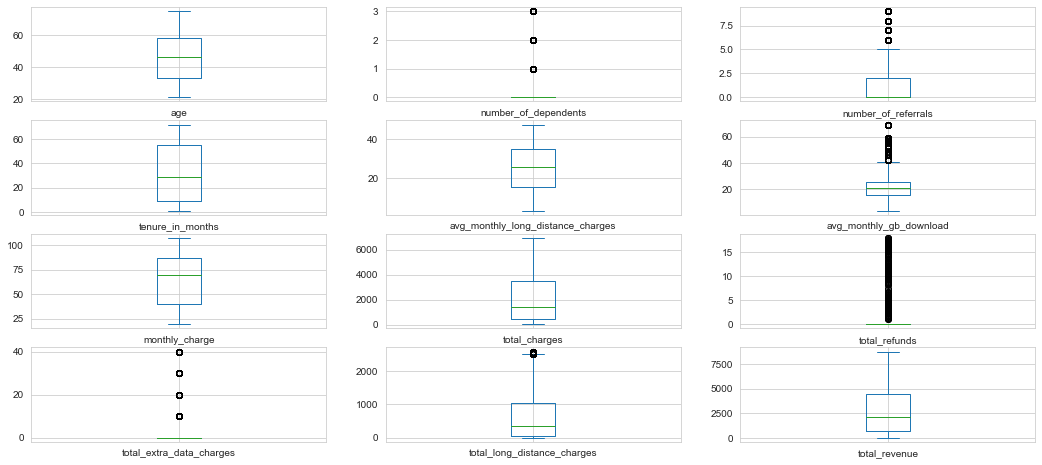

In [47]:
df_box1.plot(kind='box',subplots=True, layout=(4,3),figsize=(18,8));

**Removing Leaky & high cardinality Features**

In [48]:
df_clean[df_clean['city'] == 'Glendale'][:10]

gender   age married  number_of_dependents      city  zip_code  \
Customer ID                                                                   
0003-MKNFE     Male  46.0      No                   0.0  Glendale        70   
0303-WMMRN     Male  32.0      No                   0.0  Glendale        71   
0975-UYDTX   Female  46.0     Yes                   0.0  Glendale        71   
1024-GUALD   Female  29.0     Yes                   0.0  Glendale        71   
1047-RNXZV     Male  57.0      No                   0.0  Glendale        72   
1156-ZFYDO   Female  57.0      No                   0.0  Glendale        65   
1320-GVNHT     Male  56.0     Yes                   2.0  Glendale        71   
1349-WXNGG     Male  57.0      No                   0.0  Glendale        71   
1760-CAZHT     Male  55.0      No                   3.0  Glendale        66   
1918-ZBFQJ   Female  48.0      No                   3.0  Glendale        70   

              latitude   longitude  number_of_referrals  tenure_in_months  \
Customer ID                                                                 
0003-MKNFE   34.162515 -118.203869                  0.0                 9   
0303-WMMRN   34.182378 -118.262922                  0.0                 5   
0975-UYDTX   34.182378 -118.262922                  1.0                26   
1024-GUALD   34.182378 -118.262922                  4.0                 1   
1047-RNXZV   34.195386 -118.238508                  0.0                43   
1156-ZFYDO   34.170510 -118.289463                  0.0                 1   
1320-GVNHT   34.182378 -118.262922                  4.0                72   
1349-WXNGG   34.182378 -118.262922                  0.0                 1   
1760-CAZHT   34.167926 -118.267539                  0.0                25   
1918-ZBFQJ   34.162515 -118.203869                  0.0                13   

             ...        contract paperless_billing   payment_method  \
Customer ID  ...                                                      
0003-MKNFE   ...  Month-to-Month                No      Credit Card   
0303-WMMRN   ...  Month-to-Month               Yes      Credit Card   
0975-UYDTX   ...        One Year               Yes      Credit Card   
1024-GUALD   ...  Month-to-Month               Yes  Bank Withdrawal   
1047-RNXZV   ...        Two Year                No      Credit Card   
1156-ZFYDO   ...  Month-to-Month                No  Bank Withdrawal   
1320-GVNHT   ...        Two Year               Yes      Credit Card   
1349-WXNGG   ...  Month-to-Month                No  Bank Withdrawal   
1760-CAZHT   ...  Month-to-Month                No      Credit Card   
1918-ZBFQJ   ...  Month-to-Month               Yes  Bank Withdrawal   

            monthly_charge total_charges total_refunds  \
Customer ID                                              
0003-MKNFE             NaN        542.40           NaN   
0303-WMMRN             NaN         86.05          0.00   
0975-UYDTX           90.10       2312.55           NaN   
1024-GUALD             NaN           NaN          0.00   
1047-RNXZV           19.55        876.15         15.17   
1156-ZFYDO           19.75           NaN          0.00   
1320-GVNHT             NaN           NaN          0.00   
1349-WXNGG           20.05           NaN          0.00   
1760-CAZHT           20.80        460.20           NaN   
1918-ZBFQJ           79.25       1111.65           NaN   

             total_extra_data_charges total_long_distance_charges  \
Customer ID                                                         
0003-MKNFE                       10.0                       96.21   
0303-WMMRN                        0.0                      105.05   
0975-UYDTX                        0.0                      666.38   
1024-GUALD                        0.0                        0.00   
1047-RNXZV                        0.0                      136.74   
1156-ZFYDO                        0.0                       37.62   
1320-GVNHT                       30.0

In [49]:
df_clean.select_dtypes('category').nunique()

gender                       2
married                      2
city                      1106
offer                        6
phone_service                2
multiple_lines               2
internet_service             2
internet_type                3
online_security              2
online_backup                2
device_protection_plan       2
premium_tech_support         2
streaming_tv                 2
streaming_movies             2
streaming_music              2
unlimited_data               2
contract                     3
paperless_billing            2
payment_method               3
customer_status              3
dtype: int64

We can see that for particular `city` the `latitude & longitude` are always going to be the approximately same, besides that `city`columns has above 1100 unique value which means it is high cardinality features. Hence, we are going to remove `city` column.

In [50]:
df_clean.drop('city', axis = 1, inplace = True)

In [51]:
df_clean.head()

gender   age married  number_of_dependents  zip_code   latitude  \
Customer ID                                                                    
0002-ORFBO   Female  37.0     Yes                   0.0        41  34.827662   
0003-MKNFE     Male  46.0      No                   0.0        70  34.162515   
0004-TLHLJ     Male  50.0      No                   0.0       -45  33.645672   
0011-IGKFF     Male   NaN     Yes                   0.0        89  38.014457   
0013-EXCHZ   Female  75.0     Yes                   0.0        82  34.227846   

              longitude  number_of_referrals  tenure_in_months    offer  ...  \
Customer ID                                                              ...   
0002-ORFBO  -118.999073                  2.0                 9     None  ...   
0003-MKNFE  -118.203869                  0.0                 9     None  ...   
0004-TLHLJ  -117.922613                  0.0                 4  Offer E  ...   
0011-IGKFF  -122.115432                  1.0                13  Offer D  ...   
0013-EXCHZ  -119.079903                  3.0                 3     None  ...   

                   contract  paperless_billing   payment_method  \
Customer ID                                                       
0002-ORFBO         One Year                Yes      Credit Card   
0003-MKNFE   Month-to-Month                 No      Credit Card   
0004-TLHLJ   Month-to-Month                Yes  Bank Withdrawal   
0011-IGKFF   Month-to-Month                Yes  Bank Withdrawal   
0013-EXCHZ   Month-to-Month                Yes      Credit Card   

            monthly_charge total_charges  total_refunds  \
Customer ID                                               
0002-ORFBO            65.6        593.30            0.0   
0003-MKNFE             NaN        542.40            NaN   
0004-TLHLJ            73.9        280.85            0.0   
0011-IGKFF            98.0       1237.85            0.0   
0013-EXCHZ            83.9        267.40            0.0   

            total_extra_data_charges total_long_distance_charges  \
Customer ID                                                        
0002-ORFBO                       0.0                      381.51   
0003-MKNFE                      10.0                       96.21   
0004-TLHLJ                       0.0                      134.60   
0011-IGKFF                       0.0                      361.66   
0013-EXCHZ                       0.0                       22.14   

            total_revenue customer_status  
Customer ID                                
0002-ORFBO         974.81          Stayed  
0003-MKNFE         610.28          Stayed  
0004-TLHLJ         415.45         Churned  
0011-IGKFF        1599.51         Churned  
0013-EXCHZ         289.54         Churned  

[5 rows x 34 columns]

**Removing multicolinear columns**

<AxesSubplot:>

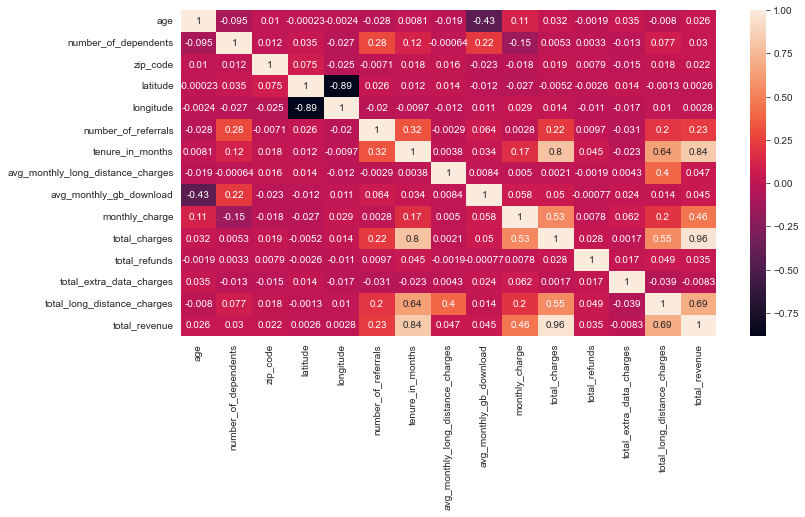

In [52]:
plt.subplots(figsize = (12,6))
corr = df_clean.corr(method='pearson')

sns.heatmap(corr, cbar = True, annot = True)

We are going to use `PCA` to remove `multicollinearity` in `Model` building part.

In [53]:
df_clean.describe()

age  number_of_dependents     zip_code     latitude  \
count  6443.000000           7017.000000  7043.000000  7043.000000   
mean     45.883750              0.451190    -2.963084    36.197455   
std      14.973058              0.917144    77.959874     2.468929   
min      21.000000              0.000000  -128.000000    32.555828   
25%      33.000000              0.000000   -72.000000    33.990646   
50%      46.000000              0.000000   -17.000000    36.205465   
75%      58.000000              0.000000    74.000000    38.161321   
max      75.000000              3.000000   127.000000    41.962127   

         longitude  number_of_referrals  tenure_in_months  \
count  7043.000000          6818.000000       7043.000000   
mean   -119.756684             1.685978         32.386767   
std       2.154425             2.662875         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             2.000000         55.000000   
max    -114.192901             9.000000         72.000000   

       avg_monthly_long_distance_charges  avg_monthly_gb_download  \
count                        6338.000000              6510.000000   
mean                           25.446540                23.637481   
std                            11.933257                13.777998   
min                             3.610000                 4.000000   
25%                            15.770000                16.000000   
50%                            25.690000                21.000000   
75%                            35.040000                26.000000   
max                            47.340000                69.000000   

       monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
count     6364.000000    6338.000000    6690.000000               6624.000000   
mean        63.675990    2108.396362       0.261570                  0.999396   
std         28.214801    1949.654766       1.813768                  5.198520   
min         19.500000      49.650000       0.000000                  0.000000   
25%         39.650000     470.687500       0.000000                  0.000000   
50%         69.950000    1394.075000       0.000000                  0.000000   
75%         87.250000    3457.787500       0.000000                  0.000000   
max        107.150000    6914.950000      17.960000                 40.000000   

       total_long_distance_charges  total_revenue  
count                  6690.000000    6337.000000  
mean                    632.036000    2824.654881  
std                     690.909804    2452.578827  
min                       0.000000      78.650000  
25%                      58.037500     727.260000  
50%                     352.515000    2108.640000  
75%                    1031.550000    4480.940000  
max                    2577.490000    8735.350000

In [54]:
#save final dataset
df_clean.to_parquet('model_data.parquet')#.drop(columns = ['total_refunds', 'total_extra_data_charges'])

In [55]:
df1 = pd.read_parquet('model_data.parquet')
df1.describe()

age  number_of_dependents     zip_code     latitude  \
count  6443.000000           7017.000000  7043.000000  7043.000000   
mean     45.883750              0.451190    -2.963084    36.197455   
std      14.973058              0.917144    77.959874     2.468929   
min      21.000000              0.000000  -128.000000    32.555828   
25%      33.000000              0.000000   -72.000000    33.990646   
50%      46.000000              0.000000   -17.000000    36.205465   
75%      58.000000              0.000000    74.000000    38.161321   
max      75.000000              3.000000   127.000000    41.962127   

         longitude  number_of_referrals  tenure_in_months  \
count  7043.000000          6818.000000       7043.000000   
mean   -119.756684             1.685978         32.386767   
std       2.154425             2.662875         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             2.000000         55.000000   
max    -114.192901             9.000000         72.000000   

       avg_monthly_long_distance_charges  avg_monthly_gb_download  \
count                        6338.000000              6510.000000   
mean                           25.446540                23.637481   
std                            11.933257                13.777998   
min                             3.610000                 4.000000   
25%                            15.770000                16.000000   
50%                            25.690000                21.000000   
75%                            35.040000                26.000000   
max                            47.340000                69.000000   

       monthly_charge  total_charges  total_refunds  total_extra_data_charges  \
count     6364.000000    6338.000000    6690.000000               6624.000000   
mean        63.675990    2108.396362       0.261570                  0.999396   
std         28.214801    1949.654766       1.813768                  5.198520   
min         19.500000      49.650000       0.000000                  0.000000   
25%         39.650000     470.687500       0.000000                  0.000000   
50%         69.950000    1394.075000       0.000000                  0.000000   
75%         87.250000    3457.787500       0.000000                  0.000000   
max        107.150000    6914.950000      17.960000                 40.000000   

       total_long_distance_charges  total_revenue  
count                  6690.000000    6337.000000  
mean                    632.036000    2824.654881  
std                     690.909804    2452.578827  
min                       0.000000      78.650000  
25%                      58.037500     727.260000  
50%                     352.515000    2108.640000  
75%                    1031.550000    4480.940000  
max                    2577.490000    8735.350000

In [56]:
df1.monthly_charge

Customer ID
0002-ORFBO    65.60
0003-MKNFE      NaN
0004-TLHLJ    73.90
0011-IGKFF    98.00
0013-EXCHZ    83.90
              ...  
9987-LUTYD    55.15
9992-RRAMN    85.10
9992-UJOEL    50.30
9993-LHIEB    67.85
9995-HOTOH    59.00
Name: monthly_charge, Length: 7043, dtype: float64

In [57]:
df_clean.monthly_charge.min()

19.5

<AxesSubplot:xlabel='number_of_dependents', ylabel='Density'>

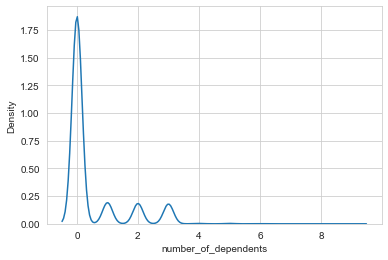

In [58]:
sns.kdeplot(data.number_of_dependents)


<AxesSubplot:xlabel='number_of_dependents', ylabel='Density'>

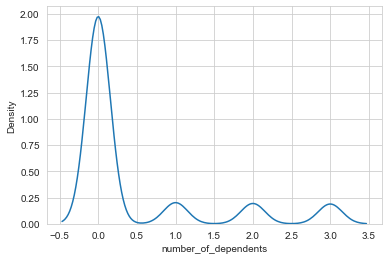

In [59]:
sns.kdeplot(df1.number_of_dependents)


<AxesSubplot:xlabel='total_refunds', ylabel='Density'>

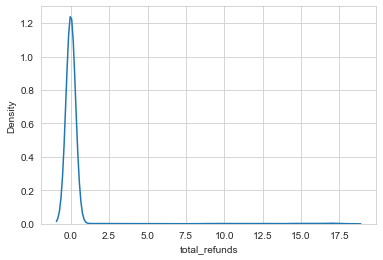

In [60]:
sns.kdeplot(df1.total_refunds)


<AxesSubplot:xlabel='total_extra_data_charges', ylabel='Density'>

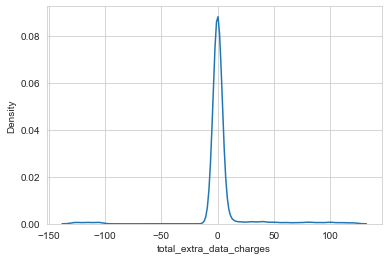

In [61]:
sns.kdeplot(data.total_extra_data_charges)

In [62]:
(df1.isna().sum()/len(df1))*100

gender                                0.000000
age                                   8.519097
married                               0.000000
number_of_dependents                  0.369161
zip_code                              0.000000
latitude                              0.000000
longitude                             0.000000
number_of_referrals                   3.194661
tenure_in_months                      0.000000
offer                                 0.000000
phone_service                         0.000000
avg_monthly_long_distance_charges    10.009939
multiple_lines                        0.000000
internet_service                      0.000000
internet_type                         0.000000
avg_monthly_gb_download               7.567798
online_security                       0.000000
online_backup                         0.000000
device_protection_plan                0.000000
premium_tech_support                  0.000000
streaming_tv                          0.000000
streaming_mov